In [ ]:
#dataset : https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
#pca

In [ ]:
import time
t0 = time.time()

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from subprocess import check_output

#dataset : 

dataset = pd.read_csv("/content/drive/MyDrive/sockets/ML_9/train.csv")

features=dataset.drop(['rn', 'activity'], axis = 1)
labels=dataset['activity']



Labels_keys = labels.unique().tolist()
Labels = np.array(Labels_keys)

print(Labels)
dict = {}
for i in range(len(Labels)):
    dict[Labels[i]]=i

print(dataset.isnull().sum())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64


In [ ]:
features=(features-features.min())/(features.max()-features.min())

In [ ]:
x = np.array(features).astype(float)
y = np.array([dict[i] for i in labels]).astype(int)
n_cluster = len(Labels)


m=len(x[0])
n=len(x)
def split(x,y,test_size):
    tot=len(x)
    t1=int(test_size*tot)
    arr = np.arange(tot)
    np.random.shuffle(arr)
    idtrain=arr[t1:]
    idtest=arr[:t1]
    print(len(idtrain),len(idtest),tot)
    print(idtrain,idtest)
    return x[idtrain],x[idtest],y[idtrain],y[idtest]

#Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest = split(x,y,1/3)


def l2_norm(a, b):
    s=0
    for p in range(len(a)):
            s= s + (a[p] - b[p])**2
    return s

def kmeans(x,n_cluster):

    m=len(x[0])
    n=len(x)
    pred=np.zeros((n), dtype=int)

    kcase=0
    while(True):
        kcase+=1
        print("kcase =",kcase)
        if(kcase>1):
            centre = np.zeros((n_cluster,m) )
            n_points= np.zeros(n_cluster)
            for i in range(n):
                n_points[pred[i]]+=1
                centre[pred[i]]+=x[i]
            for i in range(n_cluster):
                if(n_points[i]>0):
                    centre[i]/=n_points[i]

                    flag=False

            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                if(pred[i]!=minj):
                    pred[i]=minj
                    flag=True
            if(flag==False):
                break
        else:
            centre = np.zeros((n_cluster,m) )

            for j in range(m):
                minj = min(x[:, j])
                maxj = max(x[:, j])
                rangej = float(maxj-minj)
                centre[: ,j]=minj+rangej*np.random.rand(n_cluster)

            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                pred[i]=minj

    return pred

2406 1203 3609
[1497  704 3458 ... 3011 3142 1094] [ 164 2091 2283 ... 3266 2597 1530]


In [ ]:
colors=['b','g','c','r','m','y','k','w']

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10


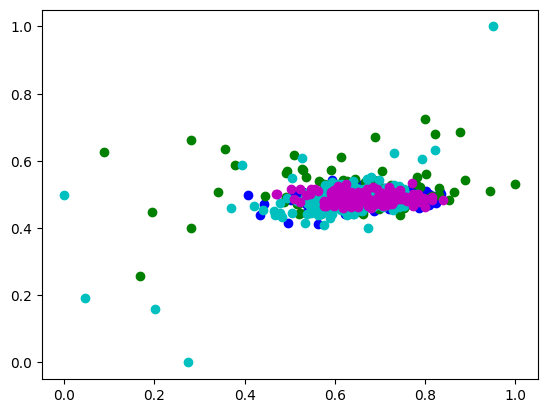

In [ ]:
pred=kmeans(x,n_cluster)
for i in range(n_cluster):
    plt.scatter(x[np.where(pred==i)][:,0], x[np.where(pred==i)][:,1], c=colors[i])

In [ ]:
hmap=np.zeros((n_cluster,n_cluster))
for i in range(n): hmap[y[i]][pred[i]]+=1

print(hmap)


[[  0. 663.   5.   0.   0.   0.]
 [  0. 615.   8.   0.   0.   0.]
 [  0. 670.  11.   0.   0.   0.]
 [292.   0. 276.   0.  35.   0.]
 [315.   0.  58.   0. 120.   0.]
 [133.   0. 402.   0.   6.   0.]]


Text(50.722222222222214, 0.5, 'True label')

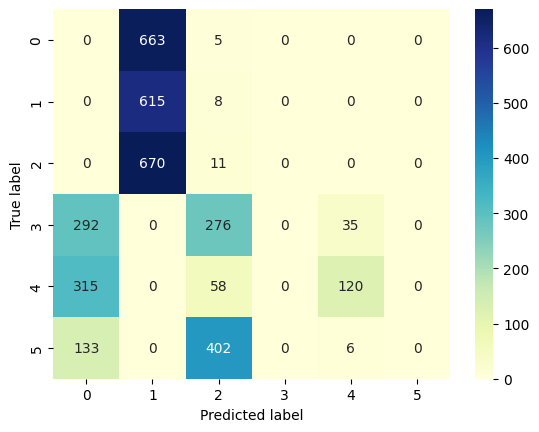

In [ ]:
sns.heatmap(pd.DataFrame(hmap), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
def cov_mat(x):
    m = x.shape[0]
    x = x - np.mean(x, axis=0)
    return 1 / m * np.matmul(x.T, x)

def PCA(x, n_components):
    cov_matrix = cov_mat(x)
    eigval, eigvec = np.linalg.eig(cov_matrix)

    idx = eigval.argsort()[::-1]
    eigvec = eigvec[:, idx]
    eigvec = eigvec[:, :n_components]

    ans = np.matmul(x, eigvec)
    return ans

In [ ]:
x_pca = PCA(x, 10)

In [ ]:
x_pca=x_pca.real

In [ ]:
x_pca

array([[-0.36844612,  0.42581834, -1.31421151, ...,  0.46661765,
         1.76600973,  0.22674541],
       [-0.26450432,  0.50229627, -1.26851564, ...,  0.44763705,
         1.63582747,  0.35776523],
       [-0.69532464,  1.33113358, -1.5182776 , ...,  0.01755026,
         1.69614625,  0.64509746],
       ...,
       [ 4.628989  , -0.68386849,  0.01346843, ...,  0.13596007,
         1.36659279,  1.04942955],
       [ 4.41358619, -0.68655126, -0.16322935, ...,  0.0725524 ,
         1.2447477 ,  0.84995766],
       [ 5.60312821,  0.56568809, -0.47567516, ...,  0.4503188 ,
         1.25279707,  0.57366752]])

In [ ]:
x1 = x_pca[:, 0]
x2 = x_pca[:, 1]

In [ ]:
pred_pca=kmeans(x_pca,n_cluster)

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10
kcase = 11
kcase = 12
kcase = 13
kcase = 14
kcase = 15
kcase = 16
kcase = 17
kcase = 18
kcase = 19
kcase = 20
kcase = 21
kcase = 22
kcase = 23
kcase = 24
kcase = 25
kcase = 26
kcase = 27
kcase = 28
kcase = 29
kcase = 30
kcase = 31
kcase = 32
kcase = 33
kcase = 34
kcase = 35
kcase = 36
kcase = 37
kcase = 38
kcase = 39
kcase = 40
kcase = 41
kcase = 42
kcase = 43
kcase = 44


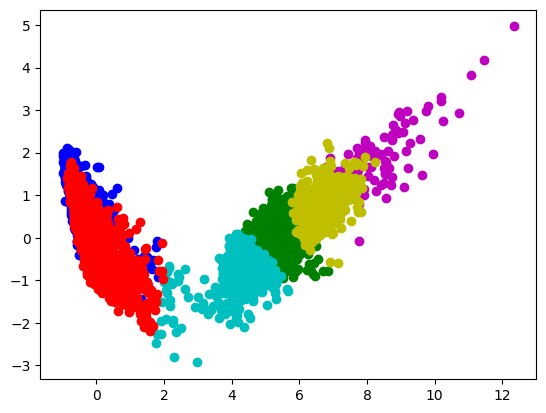

In [ ]:
for i in range(n_cluster):
    plt.scatter(x1[np.where(pred_pca==i)], x2[np.where(pred_pca==i)], c=colors[i])

In [ ]:
hmap=np.zeros((n_cluster,n_cluster))
for i in range(n):
    hmap[y[i]][pred_pca[i]]+=1

print(hmap)

[[  0.   0.   8. 660.   0.   0.]
 [ 19.   0.  13. 591.   0.   0.]
 [670.   0.  11.   0.   0.   0.]
 [  0. 342. 120.   0.  21. 120.]
 [  0. 119.  36.   0.  71. 267.]
 [  0. 196. 300.   0.   4.  41.]]


Text(50.722222222222214, 0.5, 'True label')

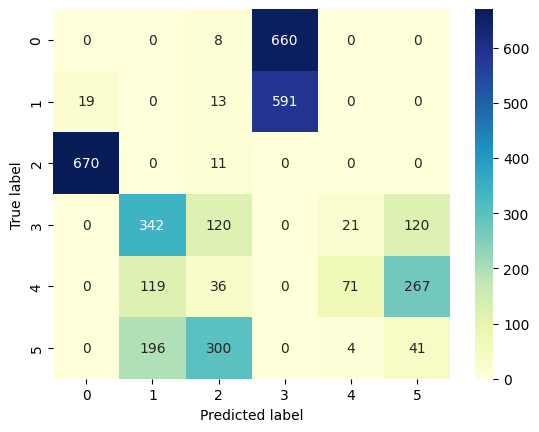

In [ ]:
sns.heatmap(pd.DataFrame(hmap), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
choose_id=np.argmax(hmap,axis=1)

In [ ]:
acc=np.zeros(n_cluster)
for _k in range(n_cluster):
    TN = TP = FN = FP = 0
    for i in range(n_cluster): #predict
        for j in range(n_cluster): #labels
            val=hmap[j][i]
            if (i==_k and j==_k): TN=TN+val
            if (i==_k and j!=_k): FN=FN+val
            if (i!=_k and j==_k): FP=FP+val
            if (i!=_k and j!=_k): TP=TP+val
    acc[_k] = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
acc

array([0.62399557, 0.64533112, 0.68218343, 0.48628429, 0.87614298,
       0.75422555])

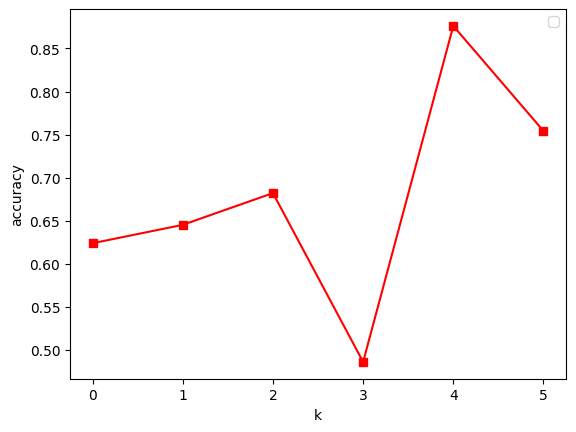

In [ ]:
plt.plot(range(n_cluster),acc,'s-',color = 'r')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend(loc = "best")
plt.show()